In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt

In [4]:
sys.path.append("../../../Scripts/")

In [5]:
import utils as gb_utils

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
images_result_path = "../Results/images/"
data_result_path = "../Results/texts/"

In [9]:
# this is the setting for plots for research paper and articles.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})

# Set the style for seaborn 
plt.style.use(['seaborn-white', 'seaborn-paper'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'small',
         'ytick.labelsize': 'small'
         }

pylab.rcParams.update(**params)

import seaborn as sns
sns.set_context(rc=params)

def stylize_axes(ax, title):
    # removes the top and right lines from the plot rectangle
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_tick_params(top=False, direction='out', width=1)
    ax.yaxis.set_tick_params(right=False, direction='out', width=1)
    
    # Enforce the size of the title, label and tick labels
    #ax.set_xlabel(ax.get_xlabel(), fontsize='medium')
    #ax.set_ylabel(ax.get_ylabel(), fontsize='medium')
    
    #ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium')
    #ax.set_xticklabels(fontsize='medium')
   
    ax.set_title(title)
    
def save_image(fig, title):
    if title is not None:
        fig.savefig(images_result_path+title+".png", dpi=300, bbox_inches='tight', transparent=True)
        fig.savefig(images_result_path+title+".pdf", bbox_inches='tight')

def figure_size(fig, size):
    fig.set_size_inches(size)
    fig.tight_layout()

In [10]:
def change_sns_bar_width(ax, new_value) :
    i = 0
    for patch in ax.patches :
        i += 1
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        if i < 7:
            patch.set_x(patch.get_x() + diff)
        else:
            patch.set_x(patch.get_x() - diff * 0.05)

In [11]:
os.listdir("../Processed data/")

['adl_activity_dataset_small.pickle',
 'adl_activity_dataset_small_minmax_scaled.pickle',
 'adl_activity_data_complete.pickle',
 'adl_activity_feature_dataset_small.pickle',
 'adl_dataset_small_minmax_scaled_feature.pickle',
 'adl_posture_dataset.pickle',
 'adl_posture_dataset_small.pickle',
 'adl_posture_data_complete.pickle',
 'adl_posture_feature_dataset.pickle',
 'adl_posture_feature_dataset_1.pickle',
 'DL_source_dataset.pickle',
 'DL_target_dataset.pickle',
 'mHealth_ankle_dataset.pickle',
 'mHealth_ankle_feature_dataset.pickle',
 'mHealth_chest_dataset.pickle',
 'mHealth_chest_feature_dataset.pickle',
 'mHealth_wrist_dataset.pickle',
 'mHealth_wrist_feature_dataset.pickle',
 'mHealth_wrist_feature_dataset_1.pickle',
 'mHealth_wrist_source_dataset.pickle',
 'mHealth_wrist_target_dataset.pickle',
 'uci_body_acc_dataset.pickle',
 'uci_feature_dataset.pickle',
 'uci_feature_dataset_1.pickle',
 'uci_source_dataset.pickle',
 'uci_target_dataset.pickle']

In [100]:
dataset_name = 'dl_posture'

# Load the UCI Feature Data and Pre-Trained Model
X, Y = gb_utils.load_data_with_preprocessing("../Processed data/adl_posture_feature_dataset.pickle")

Before Scaling: Min - Max (-5678.34731218833, 87555.07918323368)
After Scaling: Min - Max (-1.0, 1.0000000000000004)


In [101]:
X.shape

(16434, 45)

In [14]:
indexes = np.where(Y != 11)[0]
X = X[indexes]
Y = Y[indexes]

In [102]:
x_train, x_val, x_test, y_train, y_val, y_test = gb_utils.split_into_train_val_test(X, Y)
n_classes = np.max(y_train) + 1

Training set (11092, 45) 
Test set (4109, 45)
Validation set (1233, 45)


In [103]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([2739, 2739, 2739, 2739, 2739, 2739], dtype=int64))

In [17]:
os.listdir("../Saved Model/")

['adl_activity_segment_model.h5py',
 'adl_posture_feature_model',
 'adl_posture_segment_model.h5py',
 'dl_source_model',
 'dl_target_model',
 'mh_ankle_feature_model',
 'mh_ankle_segment_model.h5py',
 'mh_ankle_source_model',
 'mh_ankle_target_model',
 'mh_chest_feature_model',
 'mh_chest_segment_model.h5py',
 'mh_chest_source_model',
 'mh_chest_target_model',
 'mh_source_model',
 'mh_target_model',
 'mh_wrist_feature_model',
 'mh_wrist_segment_model.h5py',
 'mh_wrist_source_model',
 'mh_wrist_target_model',
 'uci_feature_model',
 'uci_segment_model.h5py',
 'uci_source_model',
 'uci_target_model']

In [104]:
# load the TF model
tf_model = keras.models.load_model('../Saved Model/adl_posture_feature_model')

# Check its architecture 
tf_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 45)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               5888      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 774       
Total params: 23,174
Trainable params: 23,174
Non-trainable params: 0
_________________________________________________________________


In [105]:
y_train_hot = gb_utils.get_hot_labels(y_train)
y_val_hot = gb_utils.get_hot_labels(y_val)
y_test_hot = gb_utils.get_hot_labels(y_test)

In [106]:
# Some Constant Values
min_value = -1.0
max_value = 1.0
n_feature = x_train.shape[1]
n_classes = max(y_train) + 1
epsilon = 0.5
n_iterations = 50
n_eps_per_iter = epsilon / n_iterations

In [107]:
clf_names = [
    'SVC: Support Vector Classifier',
    'RFC: Random Forest Classifier',
    'KNN: K-Nearest Neighbor Classifier',
    'DTC: Decision Tree Classifier',
    'LRC: Logistic Regression Classifier'
    'DNN: Deep Neural Network'
]

In [108]:
clfs = {
    'SVC': SVC(max_iter=5000, probability=True, gamma='scale'),
    'RFC' : RandomForestClassifier(n_estimators=100),
    'KNN' : KNeighborsClassifier(),
    'DTC' : DecisionTreeClassifier(),
    'LRC' : LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
}

In [109]:
clfs_prediction = dict()
clfs_test_score = dict()
clfs_train_score = dict()

In [110]:
for name, clf in clfs.items():
    print("Training {} now ...".format(name))
    clf.fit(x_train, y_train)
    clfs_prediction[name] = clf.predict(x_test)
    clfs_train_score[name] = clf.score(x_train, y_train) * 100
    clfs_test_score[name] = clf.score(x_test, y_test) * 100

Training SVC now ...
Training RFC now ...
Training KNN now ...
Training DTC now ...
Training LRC now ...


In [111]:
clfs['DNN'] = tf_model

In [112]:
clfs_train_score['DNN'] = tf_model.evaluate(x_train, y_train_hot)[1] * 100
clfs_test_score['DNN'] = tf_model.evaluate(x_test, y_test_hot)[1] * 100

4109/4109 [==============================] - 0s 17us/sample - loss: 0.3389 - acc: 0.8983


In [113]:
clfs_acc = pd.DataFrame(columns = ['Accuracy', 'Set', 'Classifier'])

In [114]:
for name, train_acc, test_acc in zip(clfs_train_score.keys(), clfs_train_score.values(), 
                                     clfs_test_score.values()):
    clfs_acc = clfs_acc.append({'Accuracy': train_acc, 'Set': 'Training', 'Classifier': name}, 
                               ignore_index=True)
    clfs_acc = clfs_acc.append({'Accuracy': test_acc, 'Set': 'Testing', 'Classifier': name}, 
                               ignore_index=True)
    

In [115]:
clfs_acc_not_dnn = clfs_acc[clfs_acc['Classifier'] != "DNN"]
clfs_acc_testing = clfs_acc_not_dnn[clfs_acc_not_dnn['Set'] == 'Testing']

In [116]:
clfs_acc_testing['Accuracy'].values.mean()

87.25724020442931

In [117]:
os.listdir(data_result_path)

['adl_activity_segment_model_results.txt',
 'adl_posture_segment_model_results.txt',
 'dl_source_tar_results.csv',
 'dl_source_untar_results.csv',
 'dl_target_tar_results.csv',
 'dl_target_untar_results.csv',
 'mh_ankle_segment_model_results.txt',
 'mh_ankle_source_tar_results.csv',
 'mh_ankle_source_untar_results.csv',
 'mh_ankle_target_tar_results.csv',
 'mh_ankle_target_untar_results.csv',
 'mh_chest_segment_model_results.txt',
 'mh_chest_source_tar_results.csv',
 'mh_chest_source_untar_results.csv',
 'mh_chest_target_tar_results.csv',
 'mh_chest_target_untar_results.csv',
 'mh_source_tar_results.csv',
 'mh_source_untar_results.csv',
 'mh_target_tar_results.csv',
 'mh_target_untar_results.csv',
 'mh_wrist_segment_model_results.txt',
 'mh_wrist_source_tar_results.csv',
 'mh_wrist_source_untar_results.csv',
 'mh_wrist_target_tar_results.csv',
 'mh_wrist_target_untar_results.csv',
 'trans_bet_model_adl_posture_clfs_acc.csv',
 'trans_bet_model_dl_posture_targeted.csv',
 'trans_bet_model

In [118]:
clfs_acc.to_csv(data_result_path+"trans_bet_model_"+dataset_name+"_clfs_acc.csv")

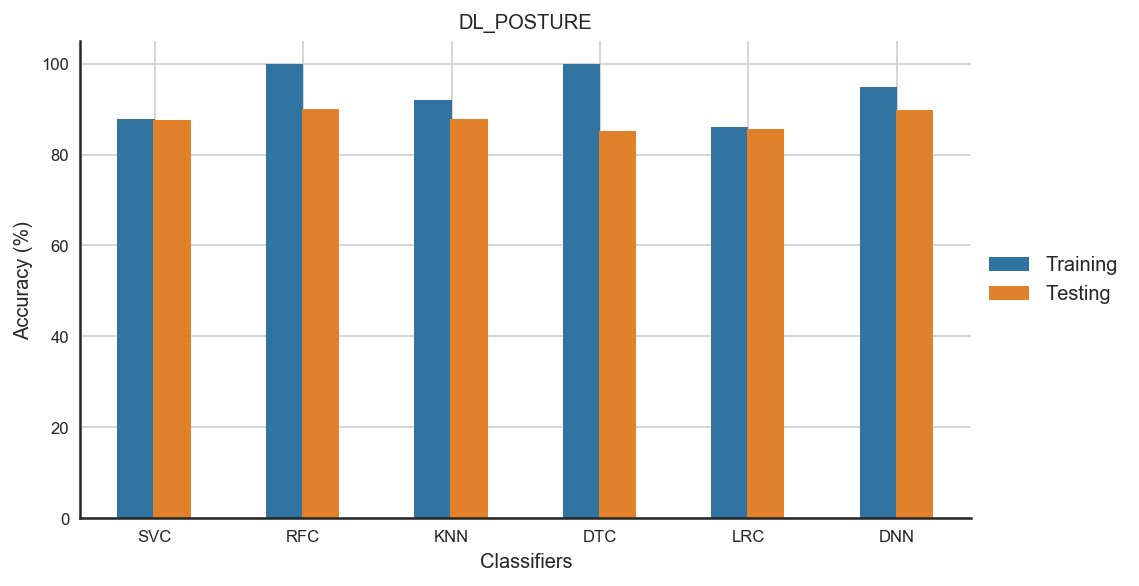

In [119]:
ax = sns.barplot(x = 'Classifier', y = 'Accuracy', hue = 'Set', data = clfs_acc)
change_sns_bar_width(ax, 0.25)

ax.grid()

# get the figure object
fig = plt.gcf()
figure_size(fig, (7, 4))

# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Classifiers")

# stylize the axes and save the figure.
title = "The classification accuracy of classifiers on test and training set."
# stylize_axes(ax, title)
stylize_axes(ax, dataset_name.upper())
save_image(fig, dataset_name+"_clfs_acc")

In [34]:
import adversarial as adv
keras.backend.set_learning_phase(0)

In [35]:
from sklearn.metrics import log_loss

# Untargeted Attack

In [120]:
adversarial = adv.AdvesarialCompute(tf_model, min_value, max_value, n_iterations, epsilon)

In [121]:
fgsm_exm = adversarial.fgsm_compute(x_test, y_test_hot)
biter_exm = adversarial.basic_iter_compute(x_test, y_test_hot)
momentum_exm = adversarial.momentum_iterative_compute(x_test, y_test_hot)
saliency_exm = adversarial.saliency_compute(x_test, y_test_hot)
carlini_exm = adversarial.carlini_compute(x_test, y_test_hot)

[INFO 2020-11-10 15:09:25,712 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x0000017F9D58F4C8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x0000017F9D58C558> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

In [122]:
adver_examples = {"FGSM": fgsm_exm, "BIM": biter_exm, "MIM": momentum_exm, "SMM": saliency_exm, "CW": carlini_exm}

In [123]:
# for untargeted examples we need to compute the loss, log-loss i.e., cross-entropy loss
untargeted_losses = pd.DataFrame(columns=['Loss', 'Accuracy', "Misclassification Rate", 
                                          'Success Score', 'Attack Method', 'Classifier'])

for name, clf in zip(clfs.keys(), clfs.values()):
    for method, examples in zip(adver_examples.keys(), adver_examples.values()):
#         print(name)
        if name != 'DNN':
            loss = log_loss(y_test, clf.predict_proba(examples))
            acc = clf.score(examples, y_test) * 100
            mis_score, _ = adv.misclassification_score(clf, examples, x_test, y_test, is_tf=False)
        else:
            loss, acc = clf.evaluate(examples, y_test_hot)
            acc = acc * 100
            mis_score, _ = adv.misclassification_score(clf, examples, x_test, y_test)
            
        untargeted_losses = untargeted_losses.append({
            'Loss': loss, 
            'Accuracy': acc,
            "Misclassification Rate": mis_score * 100,
            'Success Score' : _ * 100,
            "Attack Method": method, 
            "Classifier": name}, ignore_index = True)

4109/4109 [==============================] - 0s 16us/sample - loss: 1.0811 - acc: 0.0625


In [124]:
untargeted_losses.head()

,Loss,Accuracy,Misclassification Rate,Success Score,Attack Method,Classifier
0,2.678265,28.401071,71.598929,70.649793,FGSM,SVC
1,2.742110,44.950110,55.049890,52.105135,BIM,SVC
2,3.059437,40.739839,59.260161,57.240204,MIM,SVC
3,0.968159,70.893161,29.106839,23.387686,SMM,SVC
4,0.433301,85.397907,14.602093,2.798734,CW,SVC


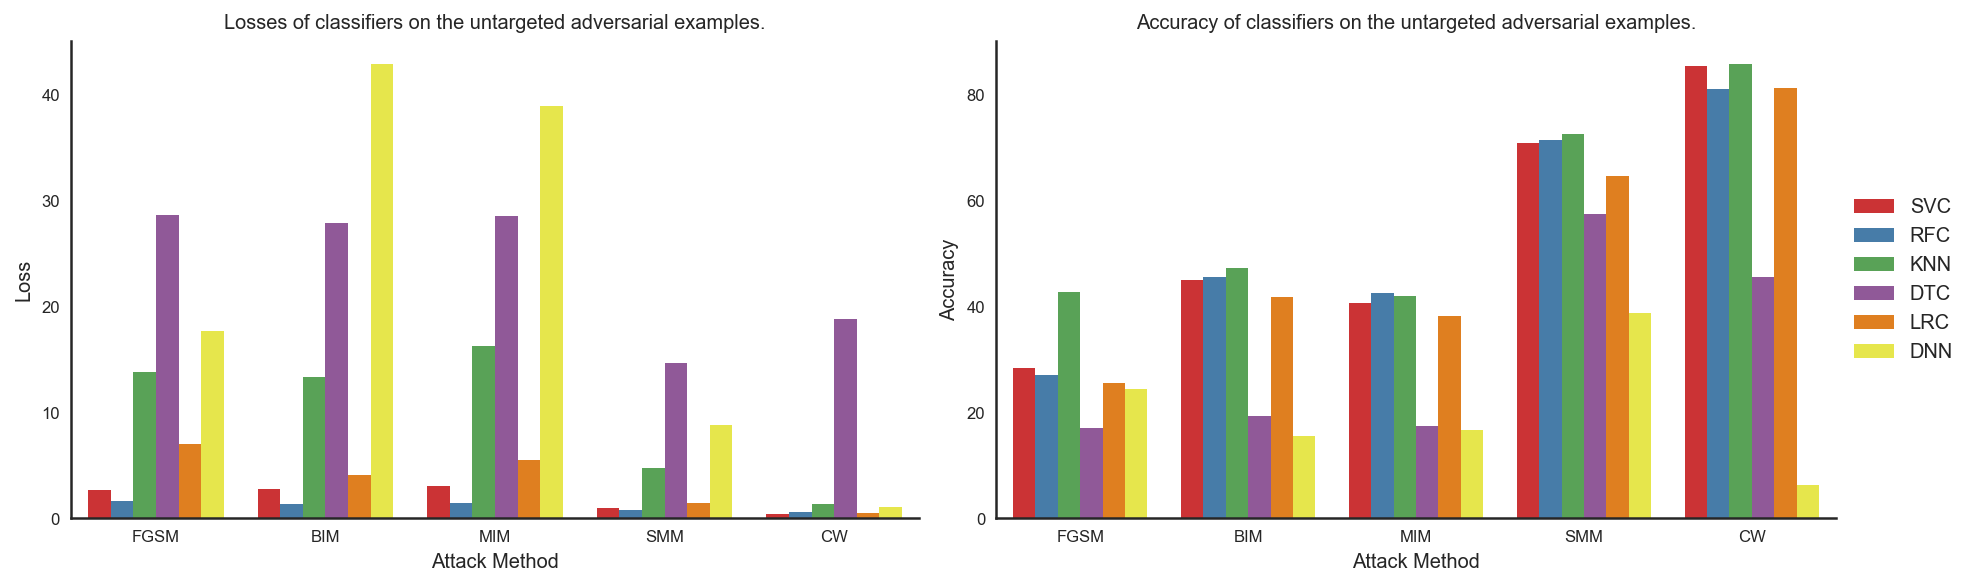

In [125]:
fig, axes = plt.subplots(1, 2)
sns.barplot(x = 'Attack Method', y = 'Loss', hue = 'Classifier', data = untargeted_losses, palette=("Set1"), ax = axes[0])
sns.barplot(x = 'Attack Method', y = 'Accuracy', hue = 'Classifier', data = untargeted_losses, palette=('Set1'), ax = axes[1])

figure_size(fig, (13, 4))

# Shrink current axis by 40%
box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# remove the legend from the first plot
axes[0].get_legend().remove()

# stylize the axes and save the image
stylize_axes(axes[0], "Losses of classifiers on the untargeted adversarial examples.")
stylize_axes(axes[1], "Accuracy of classifiers on the untargeted adversarial examples.")
# save_image(fig, "acc_loss_untargeted")

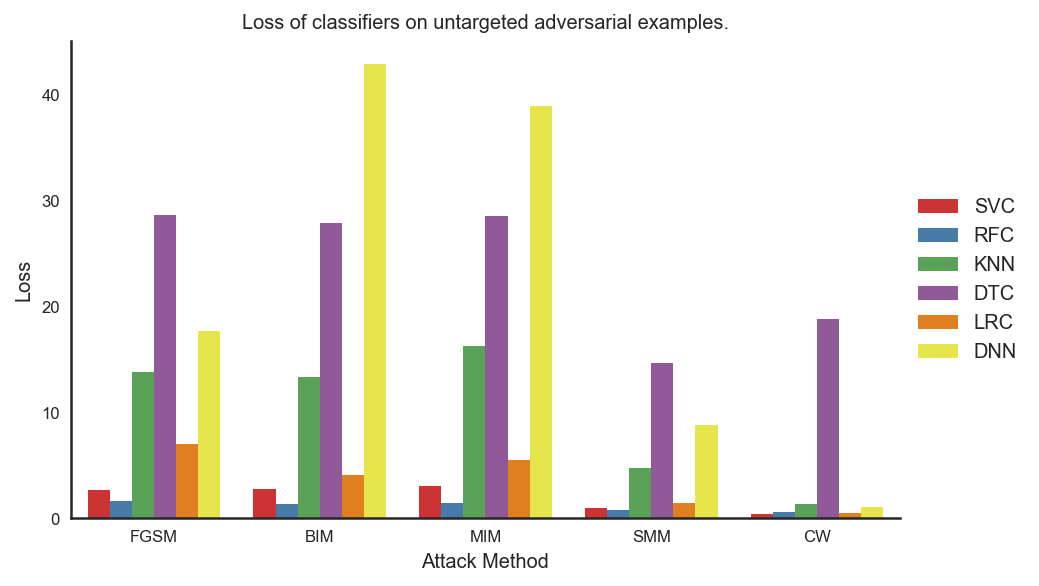

In [126]:
ax = sns.barplot(x = 'Attack Method', y = 'Loss', hue = 'Classifier', data = untargeted_losses, palette=('Set1'))
fig = plt.gcf()
figure_size(fig, (6.5, 4))

# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

stylize_axes(ax, "Loss of classifiers on untargeted adversarial examples.")
# save_image(fig, dataset_name+"_loss_untar_model_trans")

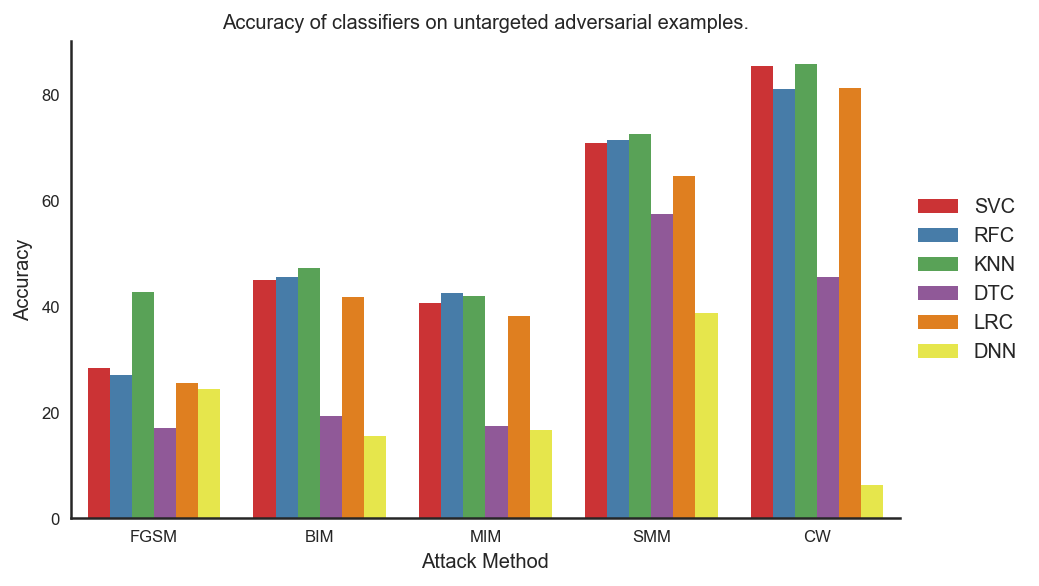

In [127]:
ax = sns.barplot(x = 'Attack Method', y = 'Accuracy', hue = 'Classifier', data = untargeted_losses, palette=('Set1'))
fig = plt.gcf()
figure_size(fig, (6.5, 4))

# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

stylize_axes(ax, "Accuracy of classifiers on untargeted adversarial examples.")
# save_image(fig, dataset_name+"_acc_untar_model_trans")

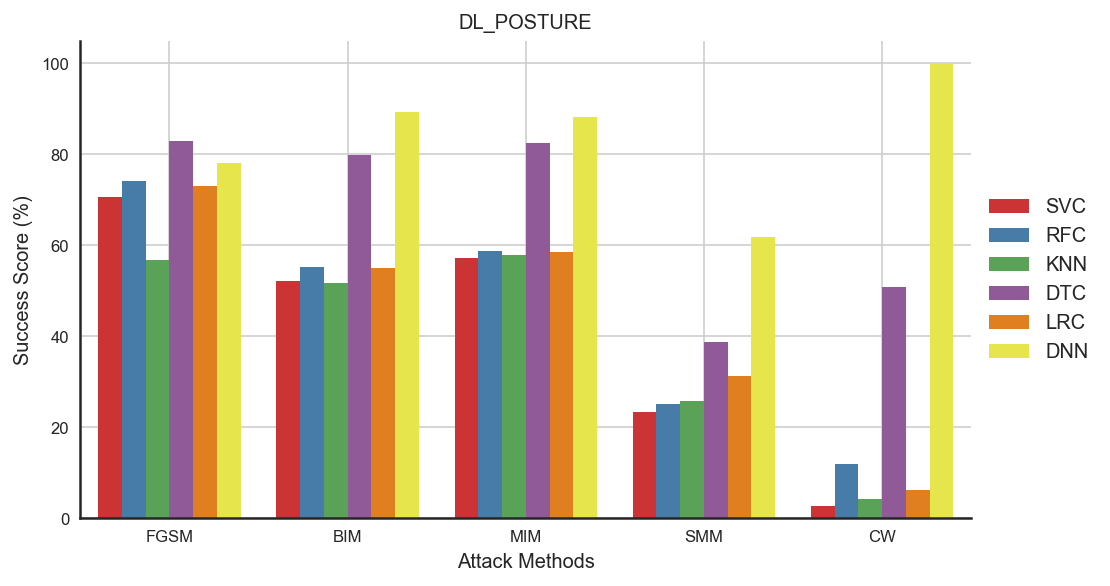

In [128]:
ax = sns.barplot(x = 'Attack Method', y = 'Success Score', hue = 'Classifier', data = untargeted_losses, 
                 palette=('Set1'))
fig = plt.gcf()
figure_size(fig, (7, 4))
ax.grid()

# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
ax.set_ylabel("Success Score (%)")
ax.set_xlabel("Attack Methods")

# stylize_axes(ax, "Misclassification rate of classifiers on untargeted adversarial examples.")
stylize_axes(ax, dataset_name.upper())
save_image(fig, dataset_name+"_ms_rate_model_trans")

# Targeted Attack

In [129]:
# For the targeted attack, we choose the Sitting class, which has the lable 3 as the target class. 
# Next, we generate targeted adversarial examples using different attack methods. 
target_class = 3
y_target = np.ones(y_test.size) * target_class
y_target_one_hot = keras.utils.to_categorical(np.ones(y_test.size) * target_class, n_classes)

In [130]:
fgsm_exm = adversarial.fgsm_compute(x_test, y_test_hot, y_target_one_hot)
biter_exm = adversarial.basic_iter_compute(x_test, y_test_hot, y_target_one_hot)
momentum_exm = adversarial.momentum_iterative_compute(x_test, y_test_hot, y_target_one_hot)
saliency_exm = adversarial.saliency_compute(x_test, y_test_hot, y_target_one_hot)
carlini_exm = adversarial.carlini_compute(x_test, y_test_hot, y_target_one_hot)

[INFO 2020-11-10 15:26:14,189 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x0000017F9D58C558> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 15:26:14,506 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x0000017F9D58C558> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

In [131]:
adver_tar_examples = {"FGSM": fgsm_exm, "BIM": biter_exm, "MIM": momentum_exm, "SMM": saliency_exm, "CW": carlini_exm}

In [132]:
targeted_stats = pd.DataFrame(columns=['Accuracy', 'Success Score', 'Attack Method', 'Classifier'])

for name, clf in zip(clfs.keys(), clfs.values()):
    for method, examples in zip(adver_tar_examples.keys(), adver_tar_examples.values()):
        if name != 'DNN':
            acc = clf.score(examples, y_target) * 100
            succ_score = adv.success_score(clf, examples, x_test, y_test, target_class, is_tf=False)
        else:
            acc = clf.evaluate(examples, y_target_one_hot)[1] * 100
            succ_score = adv.success_score(clf, examples, x_test, y_test, target_class, is_tf=True)
            
        targeted_stats = targeted_stats.append({
            'Accuracy': acc, 
            "Attack Method": method,
            'Success Score': succ_score * 100,
            "Classifier": name}, ignore_index = True)

4109/4109 [==============================] - 0s 17us/sample - loss: 0.9689 - acc: 0.9876


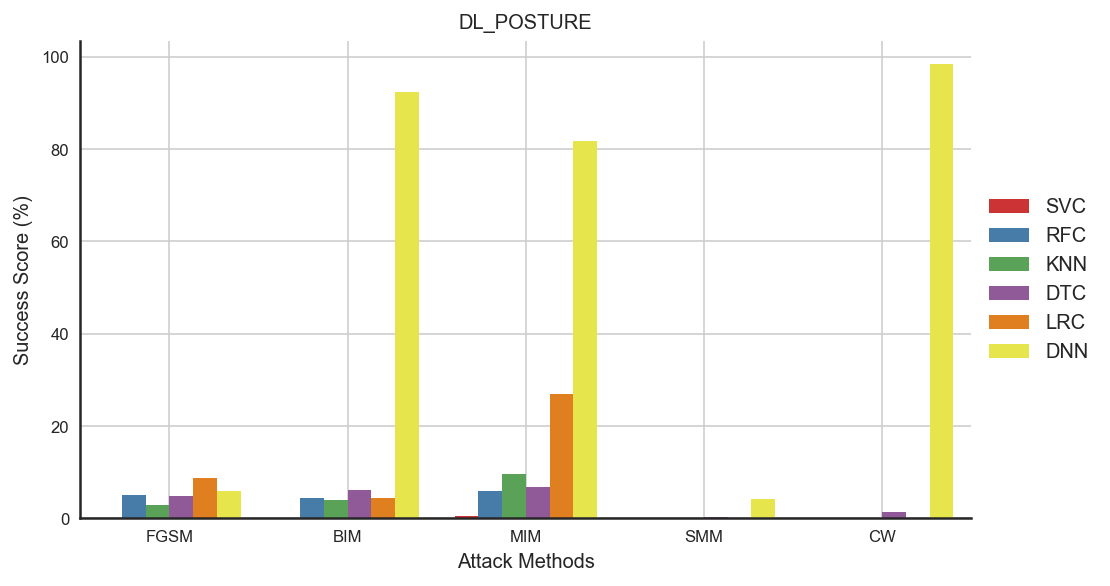

In [133]:
ax = sns.barplot(x = 'Attack Method', y = 'Success Score', hue = 'Classifier', data = targeted_stats, palette=('Set1'))
fig = plt.gcf()
figure_size(fig, (7, 4))
ax.grid()
# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
ax.set_xlabel("Attack Methods")
ax.set_ylabel("Success Score (%)")

# stylize_axes(ax, "Success rate of classifiers on targeted adversarial examples.")
stylize_axes(ax, dataset_name.upper())
save_image(fig, dataset_name+"_success_rate_model_trans")

In [134]:
# save the data for future use 
# untargeted_losses.to_pickle("results/data/uci_between_clfs_untar_results.pkl")
# targeted_stats.to_pickle("results/data/uci_between_clfs_tar_results.pkl")
untargeted_losses.to_csv(data_result_path+"trans_bet_model_"+dataset_name+"_untargeted.csv")
targeted_stats.to_csv(data_result_path+"trans_bet_model_"+dataset_name+"_targeted.csv")

In [4]:
# file = open("results/data/uci_between_clfs_untar_results.pkl", "rb")
# untargeted_losses = pickle.load(file)
# file.close()

# file = open("results/data/uci_between_clfs_tar_results.pkl", "rb")
# targeted_stats = pickle.load(file)
# file.close()

In [ ]:
# better measure for calculating the success rate and misclassification rate
